In [14]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
nodes = pd.read_csv('../data/nodes.csv')
edges = pd.read_csv('../data/edges.csv')

In [168]:
# some edges have multiple osmids, and the matching pairs are sorted oppositely
# so merging them requires sorting those lists
edges['osmid'].apply(lambda x: x.sort() if type(x) == 'list' else x)

df_u = nodes.merge(
    edges,
    left_on=['osmid'],
    right_on=['u'],
    suffixes=['_node', ''],
    how='left'
)

df_v = nodes[['osmid']].merge(
    edges,
    left_on=['osmid'],
    right_on=['v'],
    suffixes=['_node', ''],
    how='left'
)

df = pd.merge(
    df_u,
    df_v,
    left_on=['osmid_node', 'u', 'v', 'osmid'],
    right_on=['osmid_node', 'v', 'u', 'osmid'],
    how='outer',
    suffixes=['_u', '_v']
)

df.to_csv('data/test.csv')
df

,osmid_node,y,x,street_count,highway_node,ref_node,geometry_node,u_u,v_u,key_u,...,reversed_v,length_v,geometry_v,lanes_v,maxspeed_v,bridge_v,ref_v,junction_v,access_v,tunnel_v
0,90238621,38.497982,-121.555691,3.0,NaN,NaN,POINT (-121.555691 38.497982),90238621.0,90433219.0,0.0,...,True,80.001,"LINESTRING (-121.555868 38.498688, -121.555691...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90238621,38.497982,-121.555691,3.0,NaN,NaN,POINT (-121.555691 38.497982),90238621.0,90238626.0,0.0,...,True,138.515,"LINESTRING (-121.557234 38.497695, -121.557092...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90238621,38.497982,-121.555691,3.0,NaN,NaN,POINT (-121.555691 38.497982),90238621.0,90580715.0,0.0,...,False,88.226,"LINESTRING (-121.555456 38.497211, -121.555489...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90238626,38.497695,-121.557234,1.0,turning_circle,NaN,POINT (-121.557234 38.497695),90238626.0,90238621.0,0.0,...,False,138.515,"LINESTRING (-121.555691 38.497982, -121.556978...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90238634,38.508246,-121.416563,3.0,NaN,NaN,POINT (-121.416563 38.508246),90238634.0,90238636.0,0.0,...,True,270.437,"LINESTRING (-121.413455 38.508234, -121.416563...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39677,12141028171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,28.705,"LINESTRING (-121.3718028 38.5252358, -121.3716...",1,NaN,NaN,NaN,NaN,NaN,NaN
39678,12141028178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,21.137,"LINESTRING (-121.3703731 38.525245, -121.37036...",2,55 mph,NaN,NaN,NaN,NaN,NaN
39679,12141028178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,101.142,"LINESTRING (-121.3714797 38.5251947, -121.3712...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
39680,12141245483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,150.058,"LINESTRING (-121.3810947 38.5609824, -121.3808...","['5', '4']",45 mph,NaN,NaN,NaN,NaN,NaN


In [116]:
df.count()

osmid_node       39682
y                35422
x                35422
street_count     35422
highway_node      3931
ref_node           198
geometry_node    35422
u_u              35391
v_u              35391
key_u            35391
osmid            39616
name_u           33926
highway_u        35391
oneway_u         35391
reversed_u       35391
length_u         35391
geometry_u       35391
lanes_u           3783
maxspeed_u        2226
bridge_u           428
ref_u              619
junction_u         204
access_u           106
tunnel_u            10
u_v              35391
v_v              35391
key_v            35391
name_v           33926
highway_v        35391
oneway_v         35391
reversed_v       35391
length_v         35391
geometry_v       35391
lanes_v           3783
maxspeed_v        2226
bridge_v           428
ref_v              619
junction_v         204
access_v           106
tunnel_v            10
dtype: int64

There's about 10% missing coordinates. I can't match these to incidents or get satellite images so they will be dropped.

In [169]:
df = df.loc[~np.isnan(df['x'])]

In [177]:
df.count()

osmid_node       35422
y                35422
x                35422
street_count     35422
highway_node      3931
ref_node           198
geometry_node    35422
u_u              35391
v_u              35391
key_u            35391
osmid            35391
name_u           33926
highway_u        35391
oneway_u         35391
reversed_u       35391
length_u         35391
geometry_u       35391
lanes_u           3783
maxspeed_u        2226
bridge_u           428
ref_u              619
junction_u         204
access_u           106
tunnel_u            10
u_v              31166
v_v              31166
key_v            31166
name_v           30611
highway_v        31166
oneway_v         31166
reversed_v       31166
length_v         31166
geometry_v       31166
lanes_v           1175
maxspeed_v        1546
bridge_v           118
ref_v              196
junction_v           1
access_v            85
tunnel_v             2
dtype: int64

In [75]:
def plot_examples(col, n_examples=2, dropna=False):
    df_subset = df.groupby(col, dropna=dropna).sample(n_examples)
    image_ids = df_subset.osmid_node
    images = []
    for image_id in image_ids:
        try:
            img_id = int(image_id)
            img = np.asarray(Image.open(f'../data/images/satellite/{img_id}.png'))
            images.append(img)
        except:
            print(f'{img_id}.png not found')
    cols = int(len(images)/n_examples)
    _, axs = plt.subplots(cols, n_examples, figsize=(12, 12))
    axs = axs.flatten()
    titles = df_subset[col].values
    for img, ax, title in zip(images, axs, titles):
        ax.imshow(img)
        ax.title.set_text(f'{title}')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

# Node attributes
## Highway

NaN                  36123
traffic_signals       1492
turning_circle        1365
stop                   735
motorway_junction      255
mini_roundabout         48
crossing                30
turning_loop            20
Name: highway_node, dtype: int64


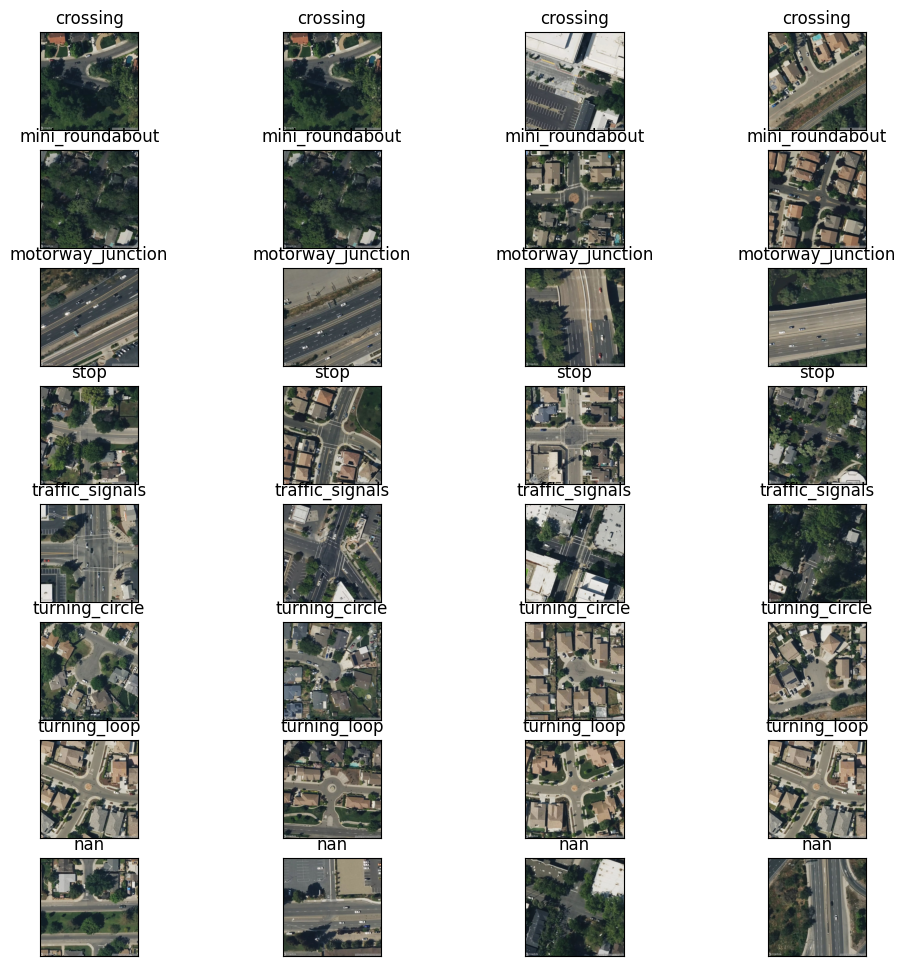

In [105]:
col = 'highway_node'
print(df[col].value_counts(dropna=False))
plot_examples(col, 4)

According to OSM's wiki, these are defined as:

1) traffic_signals: Lights that control the traffic
2) turning_circle: A turning circle is a rounded, widened area usually, but not necessarily, at the end of a road to facilitate easier turning of a vehicle. Also known as a cul de sac.
3) stop: A stop sign.
4) motorway_junction: Indicates a junction (UK) or exit (US). 
5) mini_roundabout: Similar to roundabouts, but at the center there is either a painted circle or a fully traversable island.
6) crossing: A.k.a. crosswalk. Pedestrians can cross a street here; e.g., zebra crossing
7) turning_loop: A widened area of a highway with a non-traversable island for turning around, often circular and at the end of a road.

Based on this, I will eliminate motorway_junction and crossing, and potentially turning_loop, nodes. I will also look at how many incidents occur at cul de sac's. I don't view them as intersections and will probably eliminate them as well. 

Most values are missing, however.

In [118]:
df = df.loc[~df['highway_node'].isin(['motorway_junction', 'turning_loop', 'turning_circle'])]

## Street counts

3.0    22801
4.0     9720
1.0      809
5.0      269
2.0      167
6.0       16
Name: street_count, dtype: int64


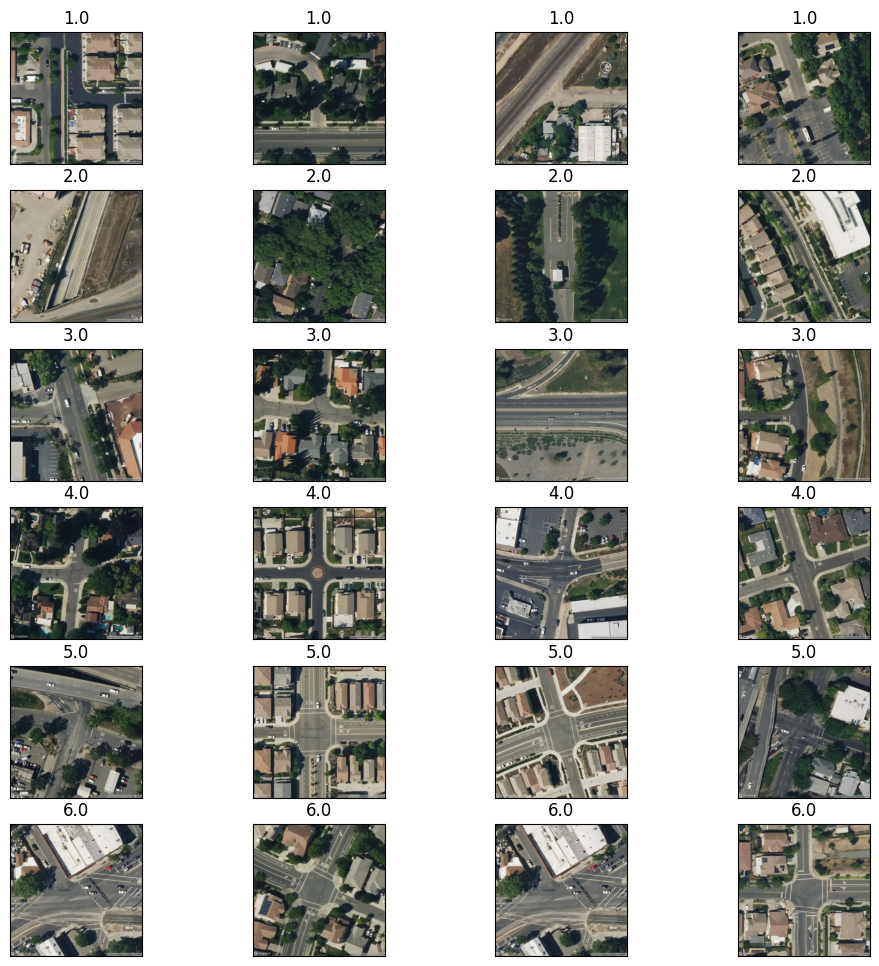

In [119]:
col = 'street_count'
print(df[col].value_counts(dropna=False))
plot_examples(col, 4, dropna=False)

In [120]:
df[['highway_node', 'street_count']].value_counts(dropna=False)

highway_node     street_count
NaN              3.0             22413
                 4.0              7971
traffic_signals  4.0              1121
NaN              1.0               806
stop             4.0               580
traffic_signals  3.0               246
NaN              2.0               163
                 5.0               134
stop             3.0               116
traffic_signals  5.0               113
mini_roundabout  4.0                48
crossing         3.0                26
stop             5.0                22
traffic_signals  6.0                 8
NaN              6.0                 4
stop             6.0                 4
crossing         2.0                 2
stop             2.0                 2
crossing         1.0                 2
stop             1.0                 1
dtype: int64

In [126]:
matches = pd.read_csv('../data/incidents/incidents_nodes_crosswalk.csv')
incidents = pd.read_csv('../data/incidents/geocoded_incidents.csv')
matches

0        90517097
1        90691837
2      8700949482
3        90560158
4        90751702
          ...    
305      90298021
306    3448342548
307    3448342579
308    6917349912
309    6917349913
Name: osmid, Length: 310, dtype: int64

In [183]:
df_incidents = df.merge(matches, left_on=['osmid_node'], right_on=['osmid'], how='inner')
df_incidents.count()

osmid_node       753
y                753
x                753
street_count     753
highway_node     110
ref_node           2
geometry_node    753
u_u              752
v_u              752
key_u            752
osmid_x          752
name_u           727
highway_u        752
oneway_u         752
reversed_u       752
length_u         752
geometry_u       752
lanes_u          207
maxspeed_u       108
bridge_u          14
ref_u             38
junction_u         0
access_u           5
tunnel_u           0
u_v              502
v_v              502
key_v            502
name_v           497
highway_v        502
oneway_v         502
reversed_v       502
length_v         502
geometry_v       502
lanes_v           52
maxspeed_v        53
bridge_v           5
ref_v             16
junction_v         0
access_v           2
tunnel_v           0
Unnamed: 0       753
CaseNum          753
osmid_y          753
distance         753
dtype: int64

In [173]:
print(df_incidents['highway_node'].value_counts(dropna=False))

NaN                  647
traffic_signals      101
turning_circle         3
stop                   3
motorway_junction      2
turning_loop           1
Name: highway_node, dtype: int64


In [171]:
print(df_incidents['street_count'].value_counts(dropna=False))

3.0    365
4.0    354
5.0     23
1.0     11
NaN      4
Name: street_count, dtype: int64


In [172]:
df_incidents.loc[np.isnan(df_incidents['street_count']),['osmid_node', 'name_v', 'CaseNum']]

,osmid_node,name_v,CaseNum
280,NaN,NaN,21-07049
281,NaN,NaN,21-07049
728,NaN,NaN,24-03125
729,NaN,NaN,24-03125


In [184]:
df_incidents = df_incidents.merge(incidents, on=['CaseNum'], how='left')

In [185]:
df_incidents['Mode'].value_counts()

Pedestrian           300
Driver               196
Motorcyclist         105
Bicyclist             81
Passenger             56
Other                 22
Motorized Scooter      8
Name: Mode, dtype: int64

In [186]:
df_peds = df_incidents.loc[~df_incidents['Mode'].isin(['Driver', 'Motorcyclist', 'Passenger', 'Other'])]

In [198]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [196]:
x = df
y = x['osmid_node'].isin(df_peds['osmid_node'].values).tolist()
y = [1 if item else 0 for item in y]
x['y'] = y
train_test_split(x)

/var/folders/s_/ms4snwvs2b59mw5fvp44bvww0000gq/T/ipykernel_45166/2585490940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['y'] = y


NameError: name 'train_test_split' is not defined